In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###  Importing,splitting the data

In [36]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [37]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [38]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

### Visualizing images 

In [49]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [54]:
def image(x,y,k):
    print("label:{}".format(y[k]))
    plt.imshow(x[k])
    plt.xlabel(classes[k])
    plt.show()
    

label:[9]


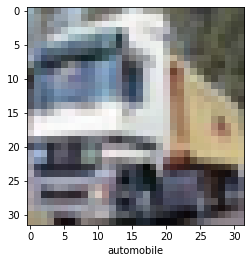

In [57]:
image(x_train,y_train,1)

label:[3]


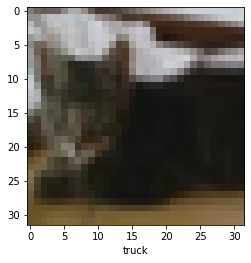

In [58]:
image(x_train,y_train,9)

label:[7]


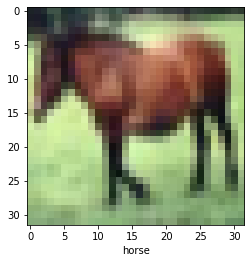

In [59]:
image(x_train,y_train,7)

In [48]:
#Reshaping x_train,x_test
#x_train=x_train.reshape(50000,1024)
#x_test=x_test.reshape(10000,1024)

### Normalizing the data

In [39]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras import activations,callbacks,optimizers
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Flatten

In [58]:
x_flatten=np.product(x_train.shape[1:])

In [59]:
x_flatten

3072

In [60]:
x_train_flatten=x_train.reshape(x_train.shape[0],x_flatten)
x_test_flatten=x_test.reshape(x_test.shape[0],x_flatten)


In [44]:
import tensorflow

In [61]:
y_train_flatten=tensorflow.keras.utils.to_categorical(y_train,10)
y_test_flatten=tensorflow.keras.utils.to_categorical(y_test,10)

In [62]:
x_train_flatten.shape,y_train_flatten.shape

((50000, 3072), (50000, 10))

### MODEL 1

In [63]:
#Creating a model
model1=Sequential()

#model.add(Flatten(input_shape=(x_flatten,)))
        
#model.add(BatchNormalization(input_shape=(32,)))

model1.add(Dense(1000,input_shape=(x_train_flatten.shape),activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(10,activation='softmax'))


In [64]:
          
#Compiling the model
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [78]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)

In [89]:
#fitting the model
history=model1.fit(x_train_flatten,y_train_flatten,epochs=10,validation_data=(x_train_flatten,y_train_flatten),callbacks=es)

Epoch 1/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.6029 - accuracy: 0.4223 - val_loss: 1.4869 - val_accuracy: 0.4784
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6039 - accuracy: 0.4198 - val_loss: 1.4915 - val_accuracy: 0.4752
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6008 - accuracy: 0.4235 - val_loss: 1.4949 - val_accuracy: 0.4730


In [84]:
model.evaluate(x_train_flatten,y_train_flatten)

1563/1563 [==============================] - 9s 6ms/step - loss: 1.5352 - accuracy: 0.4638


[1.5352107286453247, 0.46375998854637146]

In [90]:
model.evaluate(x_test_flatten,y_test_flatten)

313/313 [==============================] - 2s 7ms/step - loss: 1.5756 - accuracy: 0.4452


[1.5755987167358398, 0.44519999623298645]

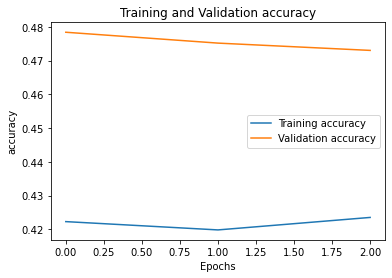

In [91]:

plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")

plt.show()

### MODEL 2

In [73]:
#Creating a model
model2=Sequential()

#model2.add(Flatten(input_shape=(32,32,3)))
        
#model2.add(BatchNormalization(input_shape=x_train_flatten.shape))

model2.add(Dense(1000,input_shape=x_train_flatten.shape,activation='relu'))

model2.add(Dense(512,activation='selu'))

model2.add(Dense(10,activation='softmax'))
          




In [74]:
#Compiling the model
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)

In [124]:
#fitting the model
history=model2.fit(x_train_flatten,y_train_flatten,epochs=5,validation_data=(x_train_flatten,y_train_flatten),callbacks=es)

Epoch 1/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4105 - accuracy: 0.4914 - val_loss: 1.4190 - val_accuracy: 0.4862
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4105 - accuracy: 0.4928 - val_loss: 1.4664 - val_accuracy: 0.4786
Epoch 3/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4031 - accuracy: 0.4963 - val_loss: 1.3570 - val_accuracy: 0.5102
Epoch 4/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4031 - accuracy: 0.4930 - val_loss: 1.4233 - val_accuracy: 0.4848
Epoch 5/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3971 - accuracy: 0.4992 - val_loss: 1.4530 - val_accuracy: 0.4799


In [94]:
model2.evaluate(x_train_flatten,y_train_flatten)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.4642 - accuracy: 0.4733


[1.4641969203948975, 0.4733400046825409]

In [95]:
model2.evaluate(x_train_flatten,y_train_flatten)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.4642 - accuracy: 0.4733


[1.4641969203948975, 0.4733400046825409]

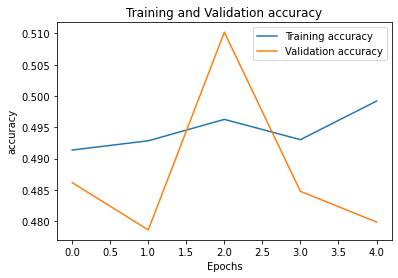

In [125]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")

plt.show()

### MODEL 3

In [113]:
#Creating a model
model3=Sequential()

        
#model.add(BatchNormalization(input_shape=(x_train.shape,)))

model3.add(Dense(1000,input_shape=x_train_flatten.shape,activation='relu'))

model3.add(Dense(512,activation='selu'))

model3.add(Dense(256,activation='relu'))

model3.add(Dense(10,activation='softmax'))
          


In [114]:
#Compiling the model
model3.compile(optimizer='Adagrad',loss='categorical_crossentropy',metrics=['accuracy'])

In [122]:
#fitting the model
history=model3.fit(x_train_flatten,y_train_flatten,epochs=3,validation_data=(x_train_flatten,y_train_flatten),callbacks=es)

Epoch 1/3
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4849 - accuracy: 0.4790 - val_loss: 1.4658 - val_accuracy: 0.4895
Epoch 2/3
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4611 - accuracy: 0.4901 - val_loss: 1.4516 - val_accuracy: 0.4933
Epoch 3/3
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4400 - accuracy: 0.4961 - val_loss: 1.4433 - val_accuracy: 0.4941


In [116]:
model.evaluate(x_train_flatten,y_train_flatten)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.5352 - accuracy: 0.4638


[1.5352107286453247, 0.46375998854637146]

In [118]:
model.evaluate(x_train_flatten,y_train_flatten)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.5352 - accuracy: 0.4638


[1.5352107286453247, 0.46375998854637146]

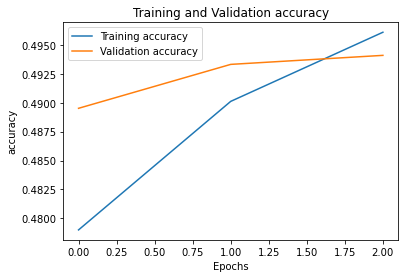

In [123]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")

plt.show()